In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from darts.datasets import AusBeerDataset
plt.style.use('default')

df = AusBeerDataset().load().pd_dataframe()
df

component,Y
date,
1956-01-01,284.0
1956-04-01,213.0
1956-07-01,227.0
1956-10-01,308.0
1957-01-01,262.0
...,...
2007-07-01,394.0
2007-10-01,473.0
2008-01-01,420.0


<AxesSubplot:xlabel='date'>

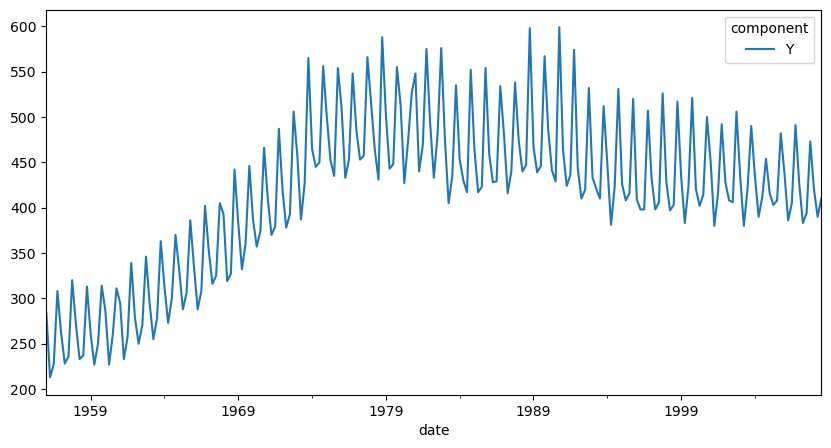

In [24]:
df.plot(figsize=(10,5))

In [25]:
df.iloc[:20]

component,Y
date,
1956-01-01,284.0
1956-04-01,213.0
1956-07-01,227.0
1956-10-01,308.0
1957-01-01,262.0
1957-04-01,228.0
1957-07-01,236.0
1957-10-01,320.0
1958-01-01,272.0


<AxesSubplot:xlabel='date'>

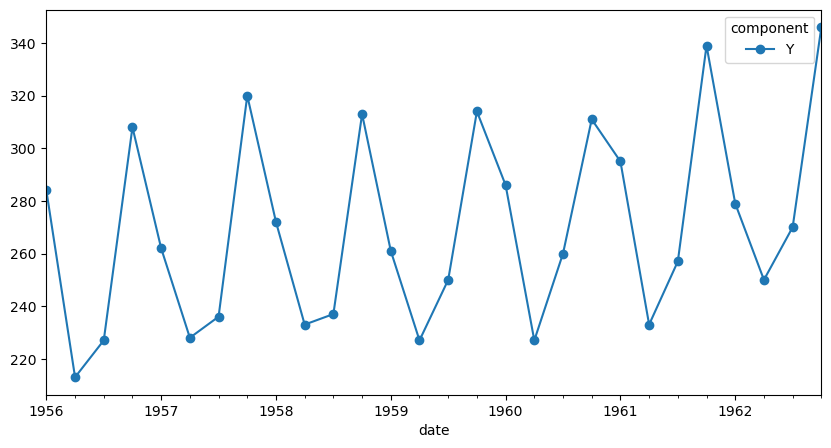

In [26]:
df.loc[:'1962'].plot(figsize=(10,5),marker='o')

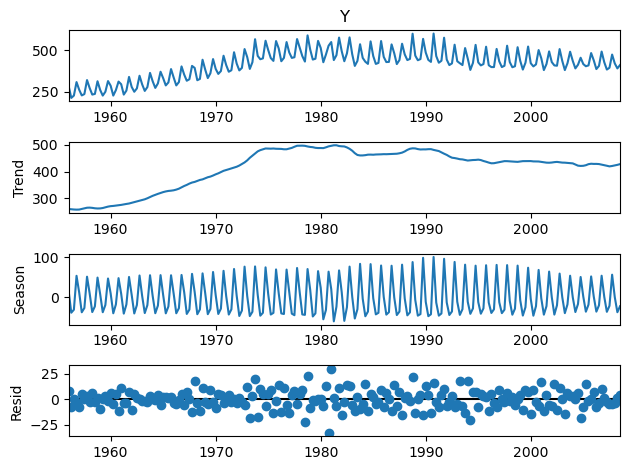

In [27]:
from statsmodels.tsa.seasonal import STL

stl = STL(df['Y'],4)
res = stl.fit()
fig = res.plot()

In [13]:
res.seasonal

date
1956-01-01     0.301027
1956-04-01   -17.906063
1956-07-01     1.914785
1956-10-01    27.594551
1957-01-01   -16.893174
                ...    
2007-07-01   -30.088646
2007-10-01    10.270993
2008-01-01     5.786269
2008-04-01    -9.315535
2008-07-01   -14.985985
Freq: QS-OCT, Name: season, Length: 211, dtype: float64

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from darts.datasets import TemperatureDataset
plt.style.use('default')

df = TemperatureDataset().load().pd_dataframe()
df.columns = ['temperature']
df = df.loc[:"1987"].dropna()
df

,temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1987-12-27,16.2
1987-12-28,14.2
1987-12-29,14.3


<AxesSubplot:xlabel='Date'>

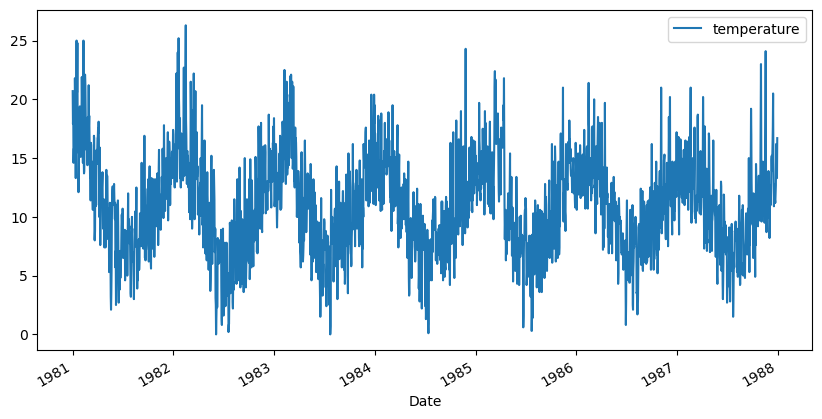

In [187]:
df.plot(figsize=(10,5))

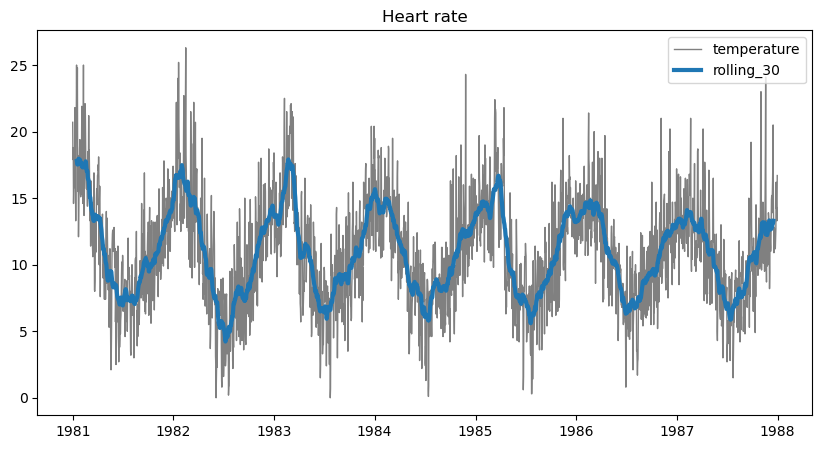

In [188]:
window_size = 30

fig , ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['temperature'], color='gray',lw=1, label='temperature')
ax.plot(df.index, df['temperature'].rolling(window=window_size, center=True).mean(),lw=3, label= f'rolling_{window_size}')
ax.set_title('Heart rate')
ax.legend()

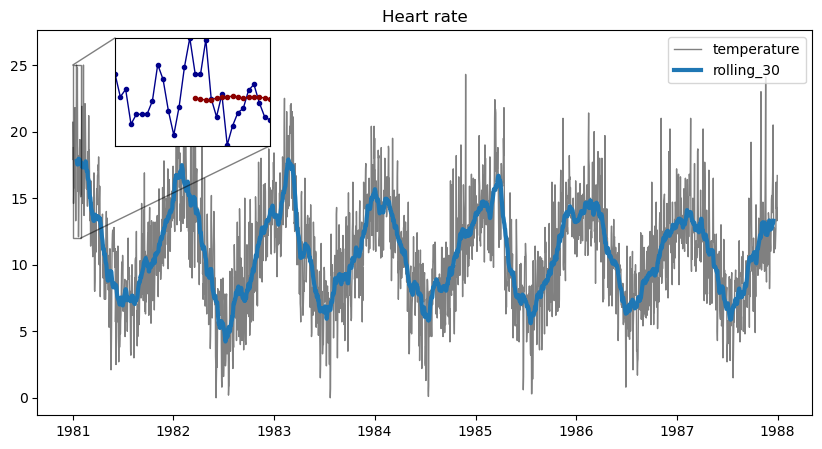

In [189]:
ax_in = ax.inset_axes([0.1, 0.7, 0.2, 0.28])
ax_in.plot(df.index, df['temperature'], "o-", lw=1, c="darkblue", ms=3)
ax_in.plot(df.index, df['temperature'].rolling(window=window_size, center=True).mean(), "o-", lw=1, c="darkred", ms=3)
ax_in.set(xlim=(pd.to_datetime("1981-01-01"), pd.to_datetime("1981-01-30")),
          ylim=(12, 25),
          xticks=[], yticks=[], xticklabels=[], yticklabels=[]
         )

ax.indicate_inset_zoom(ax_in, edgecolor="k")

display(fig)

# loess

In [190]:
df['temperature']

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1987-12-27    16.2
1987-12-28    14.2
1987-12-29    14.3
1987-12-30    13.3
1987-12-31    16.7
Name: temperature, Length: 2555, dtype: float64

In [191]:
df[df['temperature'].isnull()]

,temperature
Date,


In [226]:
from statsmodels.nonparametric.smoothers_lowess import lowess

y = df['temperature'].dropna()
x = np.arange(0,len(y))
frac = 0.05

# loess 추세 구하기
res = lowess(endog=y,
            exog=x,
            frac=frac,
            it=3)
res

array([[0.00000000e+00, 1.86365619e+01],
       [1.00000000e+00, 1.85847700e+01],
       [2.00000000e+00, 1.85328371e+01],
       ...,
       [2.55200000e+03, 1.36735220e+01],
       [2.55300000e+03, 1.37147485e+01],
       [2.55400000e+03, 1.37559945e+01]])

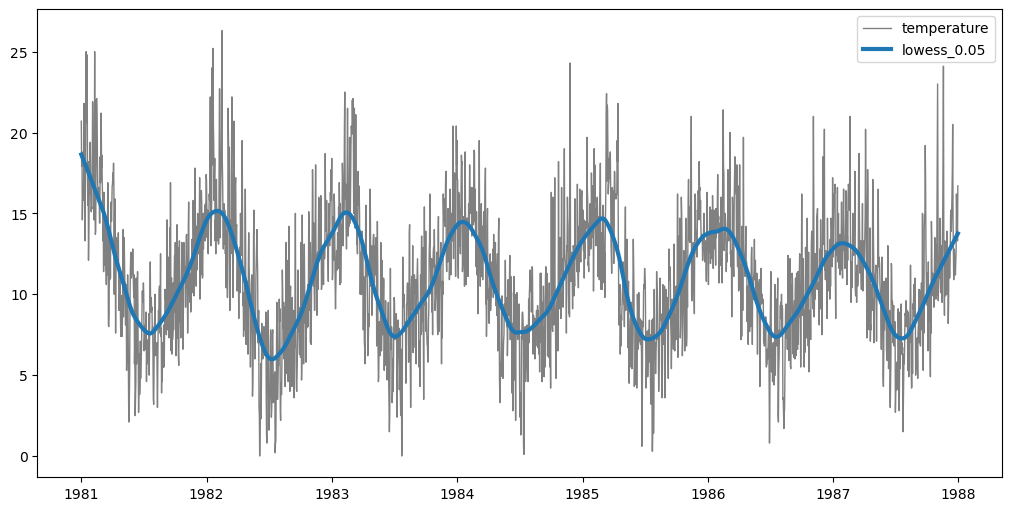

In [227]:
# 데이터프레임에 넣어주기
df['lowess'] = res[:,1]

# 시각화
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.plot(df.index, df['temperature'], color='gray',lw=1, label='temperature')
ax.plot(df.index, df['lowess'] ,lw=3, label= f'lowess_{frac}')
ax.legend()